In [1]:
from scipy.stats import multivariate_normal, norm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ground truth function
w0_gt = 0.5
w1_gt = 1/3
sigma = 0.1

target_func = lambda x : w0_gt + w1_gt * x + norm.rvs(scale=sigma, size=x.shape)

x_range = (0, 1)

In [3]:
# Prior

lmbd = 0.1
mu_0 = np.zeros(2)
Sigma_0 = lmbd * np.identity(2)

prior = multivariate_normal(mean=mu_0, cov=Sigma_0)

# generate few points (w0, w1) from prior
w_sample = prior.rvs(10)

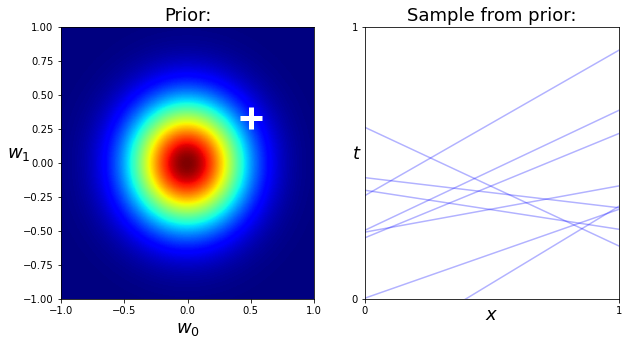

In [4]:
n_grid = 1000
w0 = np.linspace(-1, 1, n_grid)
w0_mg, w1_mg = np.meshgrid(w0, w0)
w_mg = np.stack((w0_mg, w1_mg), axis=-1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Prior:', fontsize=18)
plt.xlabel('$w_0$', fontsize=18)
plt.ylabel('$w_1$', fontsize=18, rotation=0)
plt.pcolormesh(w0_mg, w1_mg, prior.pdf(w_mg), cmap='jet', shading='auto')
plt.scatter(w0_gt, w1_gt, marker='+', s=500, color='white', linewidth=5)

plt.subplot(1, 2, 2)
plt.title('Sample from prior:', fontsize=18)
plt.xlabel('$x$', fontsize=18, labelpad=-10)
plt.ylabel('$t$', fontsize=18, labelpad=-5, rotation=0)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks([0, 1])
plt.yticks([0, 1])
x_grid = np.linspace(x_range[0], x_range[1], n_grid)
for i in range(w_sample.shape[0]):
    w = w_sample[i]
    t_grid = w[0] + w[1]*x_grid
    plt.plot(x_grid, t_grid, color='blue', alpha=0.3)
    
plt.show()

In [5]:
# gen data (x, t)
n = 1
x = np.random.uniform(x_range[0], x_range[1], size=n)
print('x=', x)
t = np.array([target_func(v) for v in x])
print('t=', t)

x= [0.56475952]
t= [0.68776619]


In [6]:
# Likelihood

# w0,w1 - meshgrids
# x - vector of size n
likelihood = lambda w0, w1, x, t: np.prod([norm.pdf(ti, loc=w0 + xi * w1, scale=sigma) 
                                           for xi, ti in zip(x,t)],
                                          axis=0)

In [7]:
# Posterior (bayes inference, was done on last lection)
X = np.stack([x ** d for d in range(2)], axis=-1)
Sigma_n = np.linalg.inv(np.linalg.inv(Sigma_0) + (1/sigma**2) * X.T.dot(X))
mu_n = Sigma_n.dot(np.linalg.inv(Sigma_0).dot(mu_0) + (1/sigma**2) * X.T.dot(t))

posterior = multivariate_normal(mean=mu_n, cov=Sigma_n)

# generate few points (w0, w1) from posterior
w_sample = posterior.rvs(10)

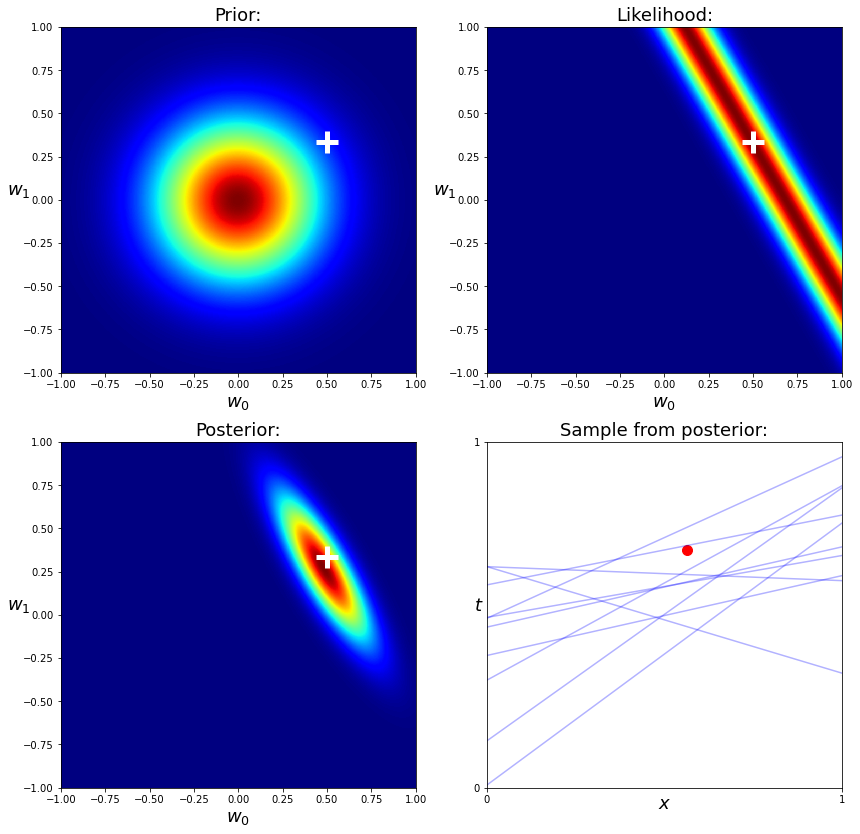

In [8]:
n_grid = 1000
w0 = np.linspace(-1, 1, n_grid)
w0_mg, w1_mg = np.meshgrid(w0, w0)
w_mg = np.stack((w0_mg, w1_mg), axis=-1)

plt.figure(figsize=(14, 14))

plt.subplot(2, 2, 1)
plt.title('Prior:', fontsize=18)
plt.xlabel('$w_0$', fontsize=18)
plt.ylabel('$w_1$', fontsize=18, rotation=0)
plt.pcolormesh(w0_mg, w1_mg, prior.pdf(w_mg), cmap='jet', shading='auto')
plt.scatter(w0_gt, w1_gt, marker='+', s=500, color='white', linewidth=5)

plt.subplot(2, 2, 2)
plt.title('Likelihood:', fontsize=18)
plt.xlabel('$w_0$', fontsize=18)
plt.ylabel('$w_1$', fontsize=18, rotation=0)
plt.pcolormesh(w0_mg, w1_mg, likelihood(w0_mg, w1_mg, x, t), cmap='jet', shading='auto')
plt.scatter(w0_gt, w1_gt, marker='+', s=500, color='white', linewidth=5)

plt.subplot(2, 2, 3)
plt.title('Posterior:', fontsize=18)
plt.xlabel('$w_0$', fontsize=18)
plt.ylabel('$w_1$', fontsize=18, rotation=0)
plt.pcolormesh(w0_mg, w1_mg, posterior.pdf(w_mg), cmap='jet', shading='auto')
plt.scatter(w0_gt, w1_gt, marker='+', s=500, color='white', linewidth=5)

plt.subplot(2, 2, 4)
plt.title('Sample from posterior:', fontsize=18)
plt.xlabel('$x$', fontsize=18, labelpad=-10)
plt.ylabel('$t$', fontsize=18, labelpad=-5, rotation=0)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks([0, 1])
plt.yticks([0, 1])
x_grid = np.linspace(x_range[0], x_range[1], n_grid)
for i in range(w_sample.shape[0]):
    w = w_sample[i]
    t_grid = w[0] + w[1]*x_grid
    plt.plot(x_grid, t_grid, color='blue', alpha=0.3)
plt.scatter(x, t, marker='o', s=100, color='red')
plt.show()

x= [0.56475952 0.63372972]
t= [0.98430873 0.74865322]


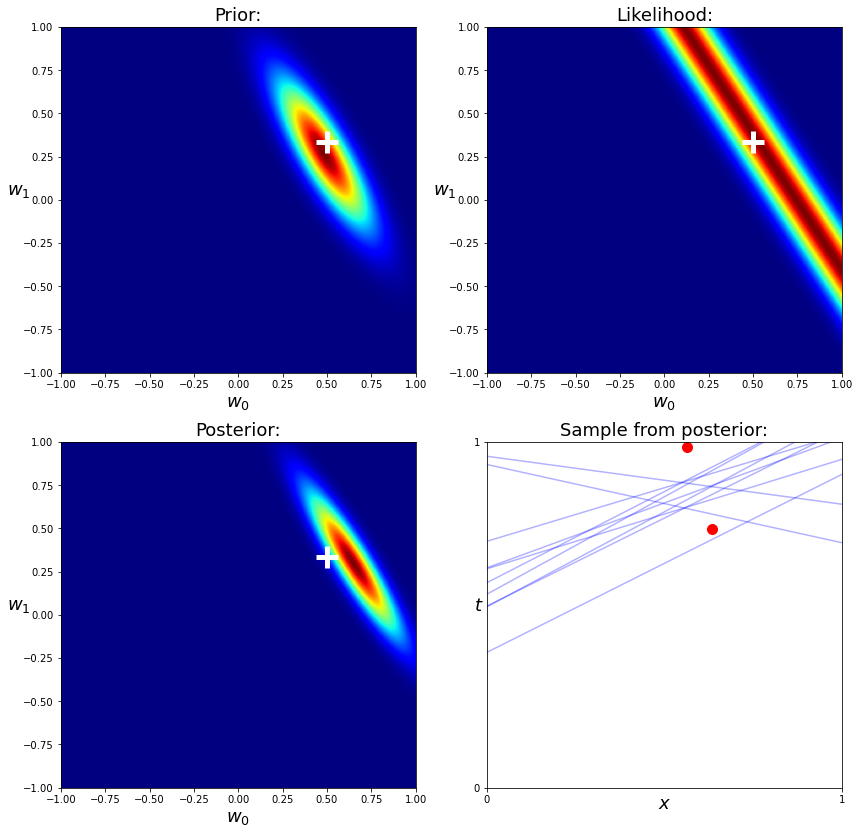

In [9]:
# MOAR DATA

n = 1
x = np.concatenate((x, np.random.uniform(x_range[0], x_range[1], size=n)))
print('x=', x)
t = np.array([target_func(v) for v in x])
print('t=', t)

# prior now is last posterior
prior = posterior

# Posterior (bayes inference, was done on last lection)
X = np.stack([x ** d for d in range(2)], axis=-1)
Sigma_n = np.linalg.inv(np.linalg.inv(Sigma_0) + (1/sigma**2) * X.T.dot(X))
mu_n = Sigma_n.dot(np.linalg.inv(Sigma_0).dot(mu_0) + (1/sigma**2) * X.T.dot(t))

posterior = multivariate_normal(mean=mu_n, cov=Sigma_n)

# generate few points (w0, w1) from posterior
w_sample = posterior.rvs(10)

n_grid = 1000
w0 = np.linspace(-1, 1, n_grid)
w0_mg, w1_mg = np.meshgrid(w0, w0)
w_mg = np.stack((w0_mg, w1_mg), axis=-1)

plt.figure(figsize=(14, 14))

plt.subplot(2, 2, 1)
plt.title('Prior:', fontsize=18)
plt.xlabel('$w_0$', fontsize=18)
plt.ylabel('$w_1$', fontsize=18, rotation=0)
plt.pcolormesh(w0_mg, w1_mg, prior.pdf(w_mg), cmap='jet', shading='auto')
plt.scatter(w0_gt, w1_gt, marker='+', s=500, color='white', linewidth=5)

plt.subplot(2, 2, 2)
plt.title('Likelihood:', fontsize=18)
plt.xlabel('$w_0$', fontsize=18)
plt.ylabel('$w_1$', fontsize=18, rotation=0)
plt.pcolormesh(w0_mg, w1_mg, likelihood(w0_mg, w1_mg, x[-n:], t[-n:]), cmap='jet', shading='auto')
plt.scatter(w0_gt, w1_gt, marker='+', s=500, color='white', linewidth=5)

plt.subplot(2, 2, 3)
plt.title('Posterior:', fontsize=18)
plt.xlabel('$w_0$', fontsize=18)
plt.ylabel('$w_1$', fontsize=18, rotation=0)
plt.pcolormesh(w0_mg, w1_mg, posterior.pdf(w_mg), cmap='jet', shading='auto')
plt.scatter(w0_gt, w1_gt, marker='+', s=500, color='white', linewidth=5)

plt.subplot(2, 2, 4)
plt.title('Sample from posterior:', fontsize=18)
plt.xlabel('$x$', fontsize=18, labelpad=-10)
plt.ylabel('$t$', fontsize=18, labelpad=-5, rotation=0)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks([0, 1])
plt.yticks([0, 1])
x_grid = np.linspace(x_range[0], x_range[1], n_grid)
for i in range(w_sample.shape[0]):
    w = w_sample[i]
    t_grid = w[0] + w[1]*x_grid
    plt.plot(x_grid, t_grid, color='blue', alpha=0.3)
plt.scatter(x, t, marker='o', s=100, color='red')
plt.show()

x= [0.56475952 0.63372972 0.05269784 0.1615189  0.60566465 0.62885651
 0.50340355 0.82250315 0.61790406 0.63917684 0.48075853 0.24981457]
t= [0.64006405 0.59294695 0.71668153 0.57898836 0.60389309 0.76337046
 0.58404946 0.79337346 0.51239873 0.72055755 0.52330071 0.64883949]


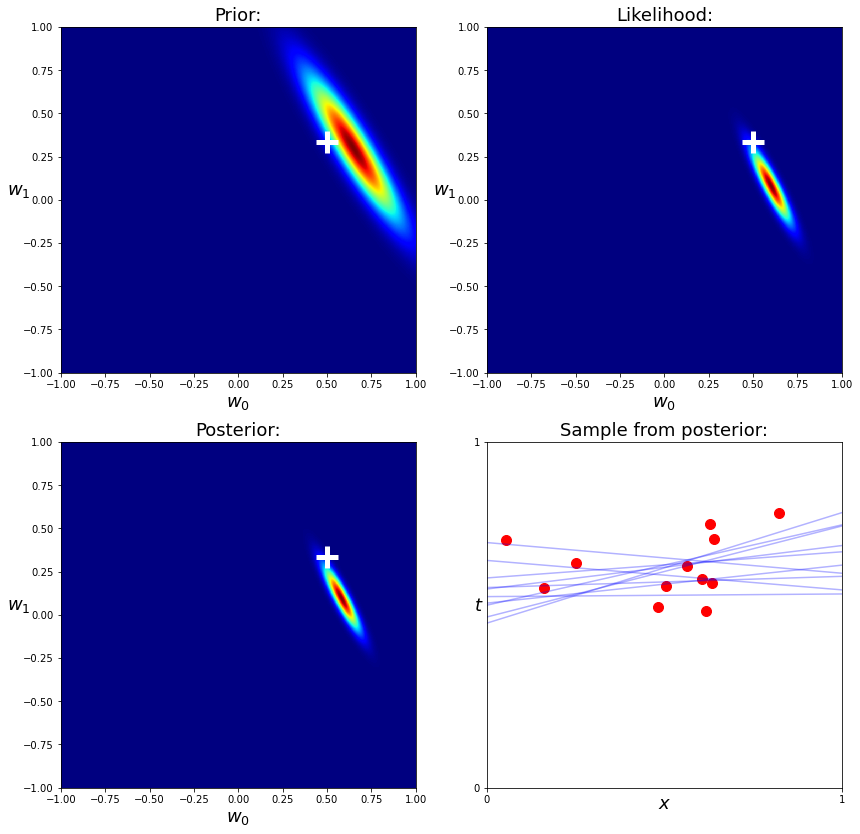

In [10]:
# EVEN MOAR DATA

n = 10
x = np.concatenate((x, np.random.uniform(x_range[0], x_range[1], size=n)))
print('x=', x)
t = np.array([target_func(v) for v in x])
print('t=', t)

# prior now is last posterior
prior = posterior

# Posterior (bayes inference, was done on last lection)
X = np.stack([x ** d for d in range(2)], axis=-1)
Sigma_n = np.linalg.inv(np.linalg.inv(Sigma_0) + (1/sigma**2) * X.T.dot(X))
mu_n = Sigma_n.dot(np.linalg.inv(Sigma_0).dot(mu_0) + (1/sigma**2) * X.T.dot(t))

posterior = multivariate_normal(mean=mu_n, cov=Sigma_n)

# generate few points (w0, w1) from posterior
w_sample = posterior.rvs(10)

n_grid = 1000
w0 = np.linspace(-1, 1, n_grid)
w0_mg, w1_mg = np.meshgrid(w0, w0)
w_mg = np.stack((w0_mg, w1_mg), axis=-1)

plt.figure(figsize=(14, 14))

plt.subplot(2, 2, 1)
plt.title('Prior:', fontsize=18)
plt.xlabel('$w_0$', fontsize=18)
plt.ylabel('$w_1$', fontsize=18, rotation=0)
plt.pcolormesh(w0_mg, w1_mg, prior.pdf(w_mg), cmap='jet', shading='auto')
plt.scatter(w0_gt, w1_gt, marker='+', s=500, color='white', linewidth=5)

plt.subplot(2, 2, 2)
plt.title('Likelihood:', fontsize=18)
plt.xlabel('$w_0$', fontsize=18)
plt.ylabel('$w_1$', fontsize=18, rotation=0)
plt.pcolormesh(w0_mg, w1_mg, likelihood(w0_mg, w1_mg, x[-n:], t[-n:]), cmap='jet', shading='auto')
plt.scatter(w0_gt, w1_gt, marker='+', s=500, color='white', linewidth=5)

plt.subplot(2, 2, 3)
plt.title('Posterior:', fontsize=18)
plt.xlabel('$w_0$', fontsize=18)
plt.ylabel('$w_1$', fontsize=18, rotation=0)
plt.pcolormesh(w0_mg, w1_mg, posterior.pdf(w_mg), cmap='jet', shading='auto')
plt.scatter(w0_gt, w1_gt, marker='+', s=500, color='white', linewidth=5)

plt.subplot(2, 2, 4)
plt.title('Sample from posterior:', fontsize=18)
plt.xlabel('$x$', fontsize=18, labelpad=-10)
plt.ylabel('$t$', fontsize=18, labelpad=-5, rotation=0)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks([0, 1])
plt.yticks([0, 1])
x_grid = np.linspace(x_range[0], x_range[1], n_grid)
for i in range(w_sample.shape[0]):
    w = w_sample[i]
    t_grid = w[0] + w[1]*x_grid
    plt.plot(x_grid, t_grid, color='blue', alpha=0.3)
plt.scatter(x, t, marker='o', s=100, color='red')
plt.show()